In [2]:
#kepler.py
import numpy as np
import matplotlib.pyplot as plt
import astropy
import scipy as sp
from astropy import constants as c
from astropy import units as u

In [423]:
class keplerCalc:
    def __init__(self,MassP=1*u.Msun, MassX=1*u.Mearth,period=1*u.year,eccentricity=0.01671,distance=1*u.au):
        self.MassP = MassP.to(u.kg)
        self.MassX = MassX.to(u.kg)
        self.period = period.to(u.s)
        self.ecc = eccentricity
        self.distance = distance.to(u.m)
        self.a = distance.value
    def calcMassP(self):
        mp = (4*(np.pi**2)*(self.distance**3))/(c.G*(self.period**2))-self.MassX
        self.MassP = mp
        return mp
    def calcMassX(self):
        mx =(4*(3.14153805**2)*(self.distance**3))/(c.G*(self.period**2))-self.MassP
        self.MassX = mx
        return mx
    def calcperiod(self):
        p = np.sqrt((4*(np.pi**2)*(self.distance**3))/(c.G*(self.MassP+self.MassX)))
        self.period = p
        return p
    def calcDistance(self):
        a = np.cbrt(((c.G*(self.MassP+self.MassX))*(self.period**2))/(4*(np.pi**2)))
        self.distance = a
        return a
    def ellipse(self):
        u= 0     #x-position of the center
        v= 0   #y-position of the center
        a= self.a
        e = self.ecc #radius on the x-axis
        b= np.sqrt(-(a**2)*((e**2)-1)) #radius on the y-axis
        print(b,a)
        t = np.linspace(0, 2*np.pi, 100)
        ellipsex =  u+a*np.cos(t) 
        ellipsey =  v+b*np.sin(t) 
        focus = u - np.sqrt((a**2)-(b**2))
        return ellipsex , ellipsey , focus
        
    

In [445]:
test = keplerCalc(1*u.Msun,317*u.Mearth,0.9*u.year,0,1*u.au)

In [446]:
el = test.ellipse()
print(el[2])

1.0 1.0
0.0


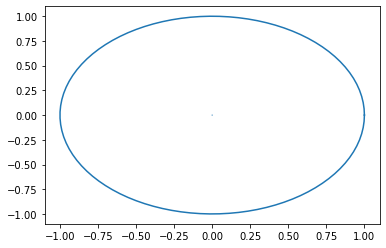

In [447]:
fig, ax = plt.subplots()
ax.plot(el[0],el[1])
circle = plt.Circle((el[2],0),0.00465047)
ax.add_patch(circle)

In [448]:
m =test.calcMassX().to(u.Mearth)
m
#print(np.pi, 1*u.Msun.to(u.kg), 1*u.year.to(u.s), 1*u.au.to(u.m))

<Quantity 78099.70051933 earthMass>

38.47841760435743


In [444]:
class position:
    def __init__(self,ellipsex,ellipsey,period):
        self.ellipsex = ellipsex
        self.ellipsey = ellipsey
        self.period = period.to(u.year).value
        self.animationPeriod = (self.period * 5)*u.s
    def angspeed(self):
        pass
    def x(self,T):
        pass
    def y(self,T):
        pass
    

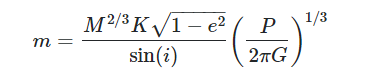


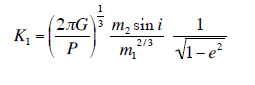


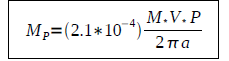

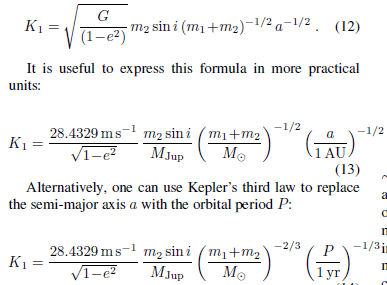

In [61]:

class RV:
    '''
    units required
    
    '''
    def __init__(self,massX,massP,period,ecc,distance):
        self.massX = massX
        self.massP = massP
        self.period = period
        self.ecc = ecc
        self.a = distance
    def amplitudeCalc(self):
        #K = np.sqrt(c.G/(1-self.ecc**2))*self.massX*(self.massP+self.massX)**(-1/2)*self.a**(-1/2)
        K = (self.massX*2*np.pi*self.a)/(self.period*self.massP*2.1*(10**-4))
        self.amplitude = K
        return K*u.m/u.s
    def sinusoid(self):
        pass
    


In [66]:
test1 = RV(317*u.Mearth.to(u.kg),1*u.Msun.to(u.kg),12,0,5.2)
test1.amplitudeCalc()

<Quantity 12.34434439 m / s>

In [11]:
class database:
    def __init__(self):
        pass

0.5999999999999999 1.0


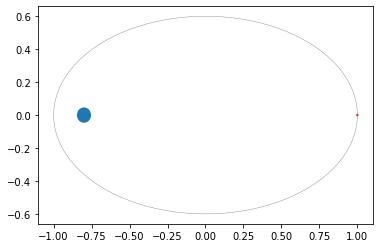

In [12]:
#visual.py
#from kepler import *
#import streamlit as st
import matplotlib.pyplot as plt
#st.title('My Webapp')


test = keplerCalc(eccentricity=0.8)
el = test.ellipse()
fig, ax = plt.subplots()#figsize= (10,10))
ax.plot(el[0],el[1],color='gray', linewidth = 0.4)
circle = plt.Circle((el[2],0),0.00465047*10)
ax.add_patch(circle)
circle2 = plt.Circle((1,0), (1/23454.8)*100, color = 'red')
ax.add_patch(circle2)

#st.pyplot(fig)

0.9998603782028769 1.0
(100,) (100,)


TypeError: set_offsets() takes 2 positional arguments but 3 were given

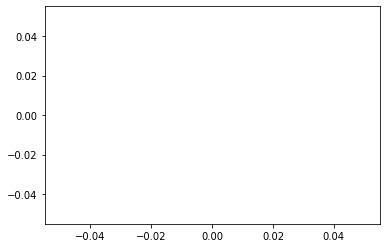

In [17]:
test = keplerCalc()
el = test.ellipse()
x = el[0]
y = el[1]
def update_line(i, x,y ,line):
    print(x.shape, y.shape)
    x1 = x[i]
    y1 = y[i]
    
    line.set_offsets(x1,y1)
    return line,

fig = plt.figure()

# Fixing random state for reproducibility
#np.random.seed(19680801)

#data = keplerCalc()
data = np.random.rand(2,25)
l = plt.scatter([], [],)

update_line(1,x,y,l)